# AIN 214 PA3 on Data Prepocessing and Regression

# THE STUDENT INFO
## Student Name: Sümeyra Koç
## Student ID: 2210765020

In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
# Replace 'path_to_dataset' with the actual file path
path_to_dataset = 'housing.csv'
housing_df = pd.read_csv(path_to_dataset)

# We will deal with the famous California Housing Prices dataset from Kaggle. [1]

# 1. Data Preprocessing (50 Pts)

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features 
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [70]:
#Check for missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* In all data set, there are only 207 missing data of "total_bedrooms" feature, any other features have no missing data.

In [71]:
# Let's drop the missing values
housing_df.dropna(inplace=True)

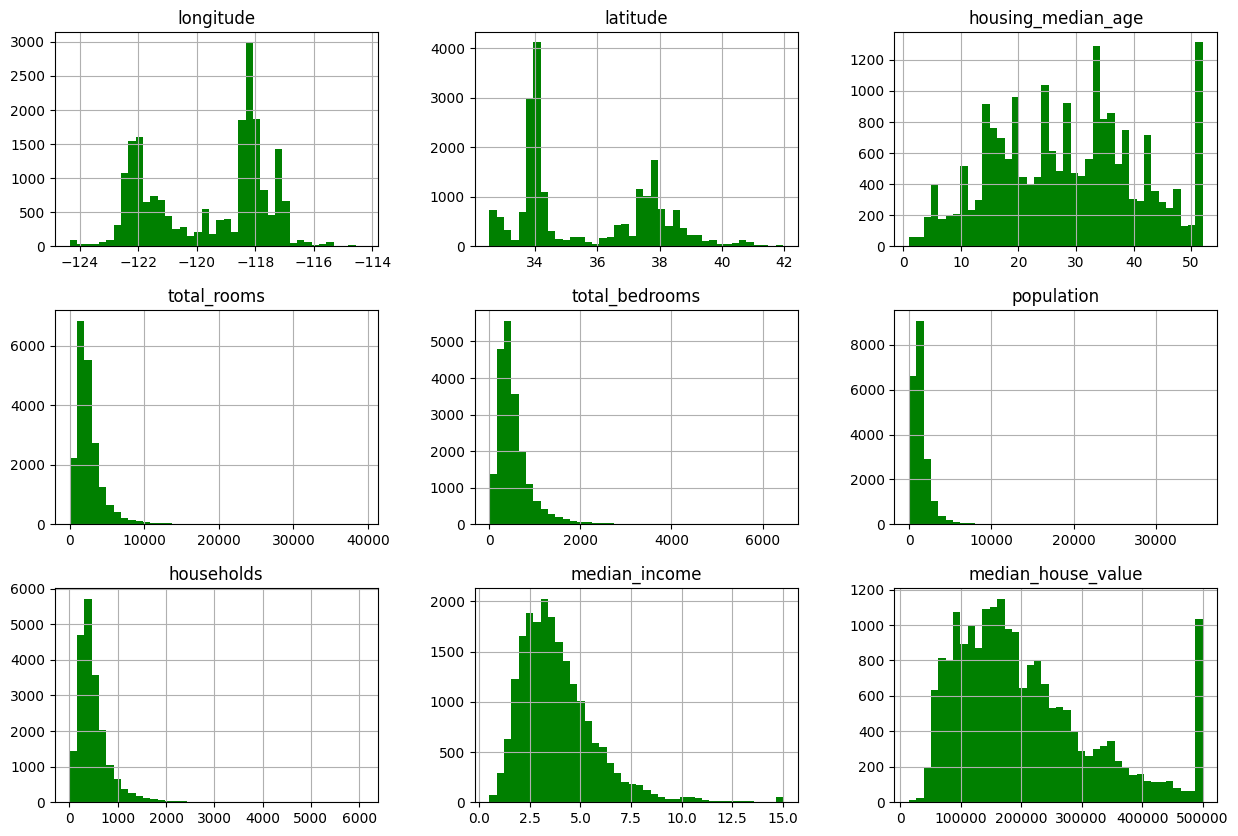

In [72]:
#Visualize the features with any relevant plots to understand the distribution of data
# for numeric features
housing_df.hist(bins=40, figsize=(15, 10),color = "green")
plt.show()

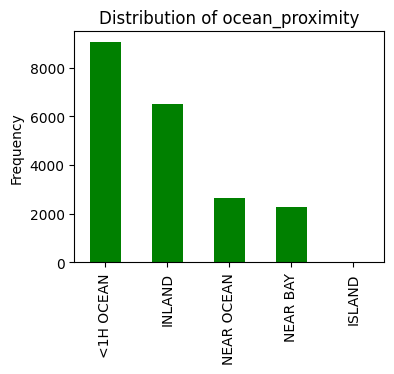

In [73]:
# for feature that has non-numeric values which is "ocean_proximity" feature
plt.figure(figsize=(4, 3))
housing_df["ocean_proximity"].value_counts().plot(kind='bar', color='green')
plt.title(f'Distribution of {"ocean_proximity"}')
plt.xlabel("")
plt.ylabel('Frequency')
plt.show()

In [74]:
#Visualize the target variable with respect to the features
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


As you can see on the table these "house features" are for calculating the value of the house. So the target variable should be median_house_value
Let's visualize median_house_value variable with respect to the features

In [75]:
target_variable = 'median_house_value'

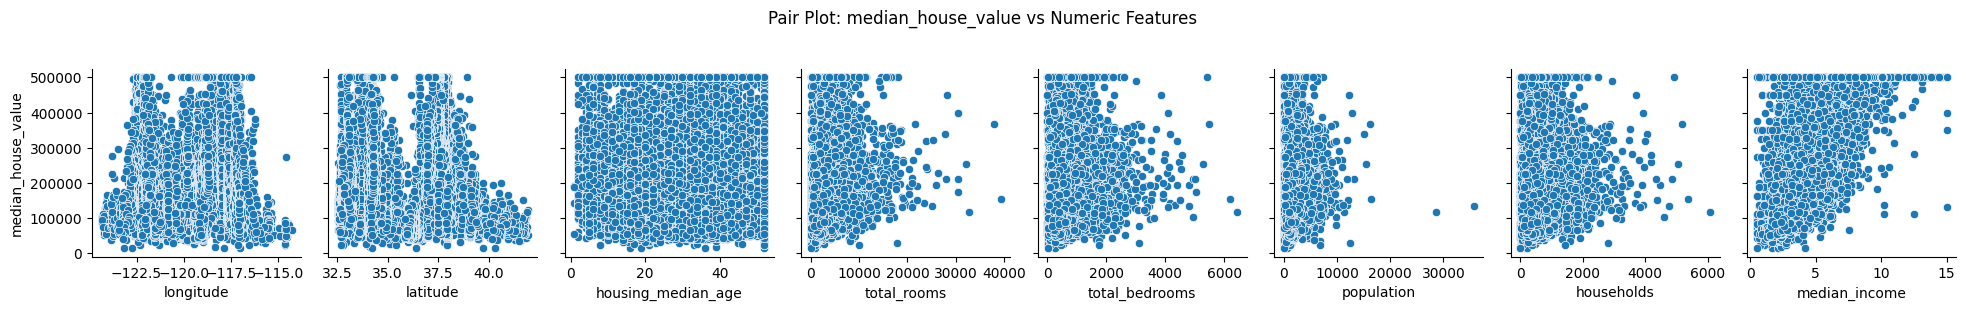

In [76]:
sns.pairplot(housing_df, x_vars=housing_df.select_dtypes(include=['number']).iloc[:, :-1].columns, y_vars=target_variable)
plt.suptitle(f'Pair Plot: {target_variable} vs Numeric Features', y=1.2)
plt.show()

* For "longtitude - target" and "latitude - target" scatter plots there are data clusters (two).
* On "age of house - target" scatter plot, these variable are independent from each other. Also in the data set, there are houses of all ages and all values (price of house), so it is possible to find a house at any age and at any price.
* "target - total room" and "target - total bedrooms" scatter plots are similar to each other which is make sense because bedroom is also a room.
* population-target scatter plot there are outliers
* median_income - target scatter plot has positive relationship between these two variables which is make sense, it is normal for household income to increase as the price of the house rises.

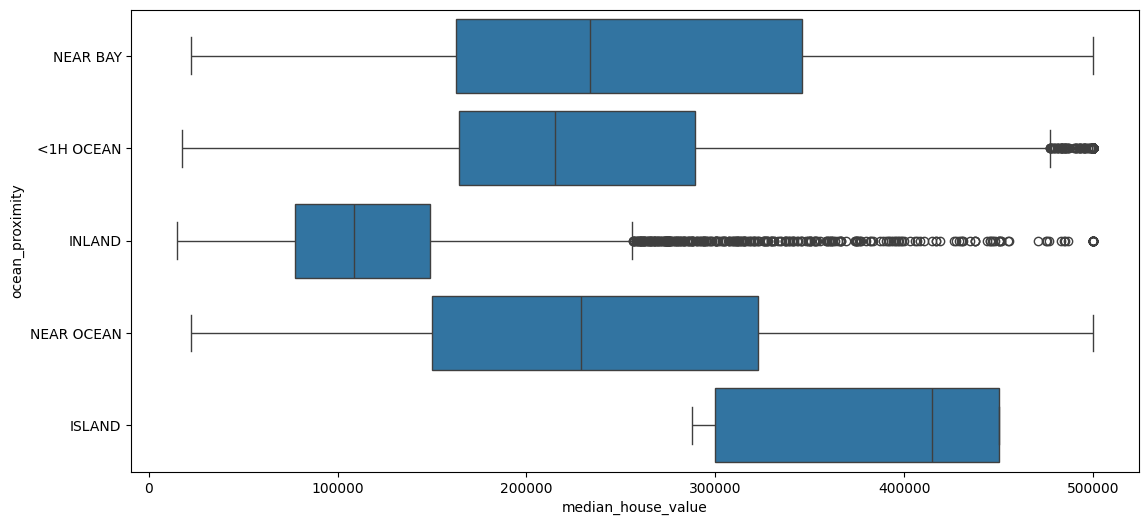

In [77]:
plt.figure(figsize=(13, 6))
sns.boxplot(x='median_house_value', y='ocean_proximity', data=housing_df)
plt.show()

* Near Bay, Ocean and Near Ocean variables have fairly wide price range. 
* The average values of houses on the islands are quite higher than the average values of houses in other house locations.
* Near Bay and Near Ocean Box Plots are similar with each other because these varaibles are similiar in real.
* Inland house location has lowest value of house but the amount of outliers is at most in Inland house location. Since most people live on in-land, it is normal for the lowest-priced houses to be on in-land(so tahta mean is low), and since the average house price on land is low, it is normal for high-priced houses to be considered outlier.

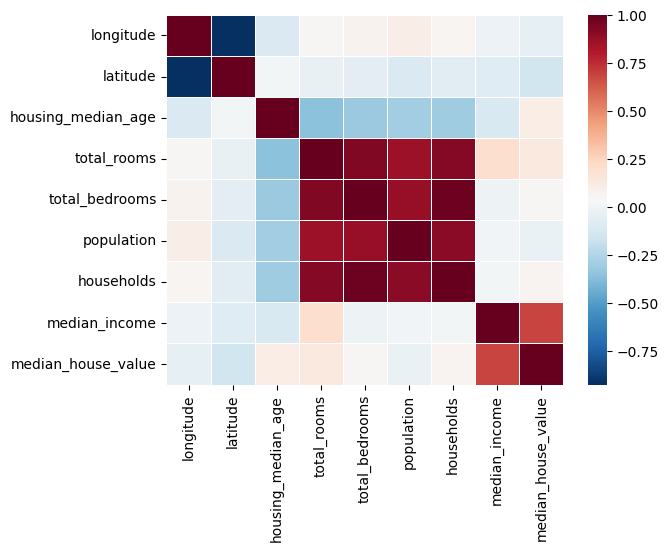

In [78]:
#Visualize the correlation between the features using a heatmap
# for features that have numeric data type 
numeric_cols = housing_df.select_dtypes(include=[np.number]).columns
sns.heatmap(housing_df[numeric_cols].corr(), annot=False, cmap='RdBu_r', fmt=".3f", linewidths=0.5)
plt.show()

* We can't visualize the correlation between the categorical features using a heatmap, because there is only one categorical features which is ocean_proximity column. That is, we can't calculate corralation with just one variable.
* But as you can see we  visualized the numeric variables. On the diagonal of the matrix all values's are 1 (squares's colors are dark red) because the distance of something to itself is zero so that it similar one hundred percent to itself. 
* The correlation matrix is symmetric because similarity of A to B is same with similarity of B to A.
* The pair of features with the most negative corelation is latitude and longtitude fetaures pair.

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

# Choose an outlier detection method and Explain your method and why you choose it.
For categorical variables: If we look at above histogram, titled "Distribution of ocean_proximity", we can see that all the data is significantly distributed over other 4 values except the ISLAND value. In all data set there are just 5 records that has ISLAND value as value of ocean_proximity (the amount of 5 is very low compared to all the data which is 20000-odd). Due to the extremely small amount of outliers, our method of detecting outliers in categorical variables will be slightly outside the known. We will detect outliers by simply finding records whose ocean_proximity value is equal to the ISLAND value. This will save us time and energy.

For numeric variables: We have two method of outlier detection which are IQR and Z-Score. Z-score method can be sensitive to a dataset that has a heavy tail or is skewed but IQR not. IQR is less affected by the skewness or distribution of the data. 
In the part that we visualize the distribution of the features with histogram plots there are plots that has skewness which are total_rooms,total_bedrooms,	population,	households,	median_income features. We can apply IQR to these features to find their outliers. 
For rest of features, the distribution of these features (as you can see in the part that we visualize the distribution of the features with histogram plots) are not normally distributed. Since if the data is not normally distributed, the IQR method might be preferred due to its robustness. 

As a result we will detect outliers of numeric variables by using IQR method. 
# Apply it to the data

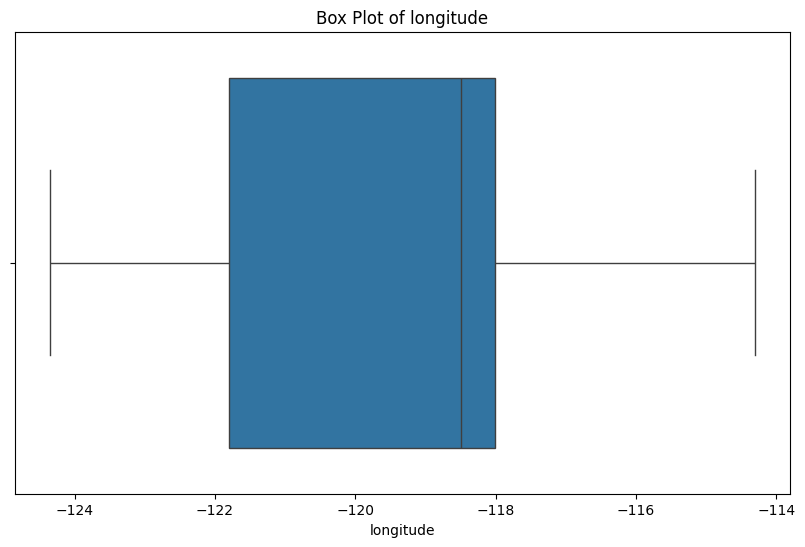


Outliers for longitude:
Empty DataFrame
Columns: [longitude]
Index: []

Lower Whisker: -127.48499999999999
Upper Whisker: -112.32500000000002


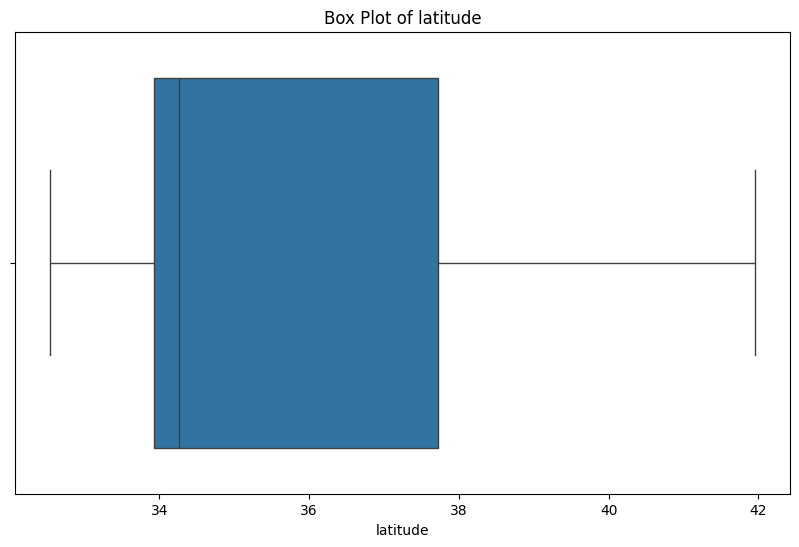


Outliers for latitude:
Empty DataFrame
Columns: [latitude]
Index: []

Lower Whisker: 28.245
Upper Whisker: 43.405


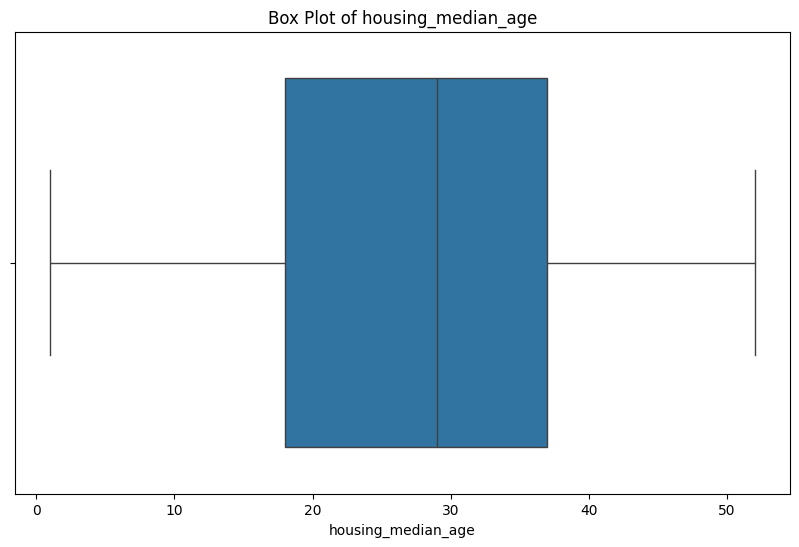


Outliers for housing_median_age:
Empty DataFrame
Columns: [housing_median_age]
Index: []

Lower Whisker: -10.5
Upper Whisker: 65.5


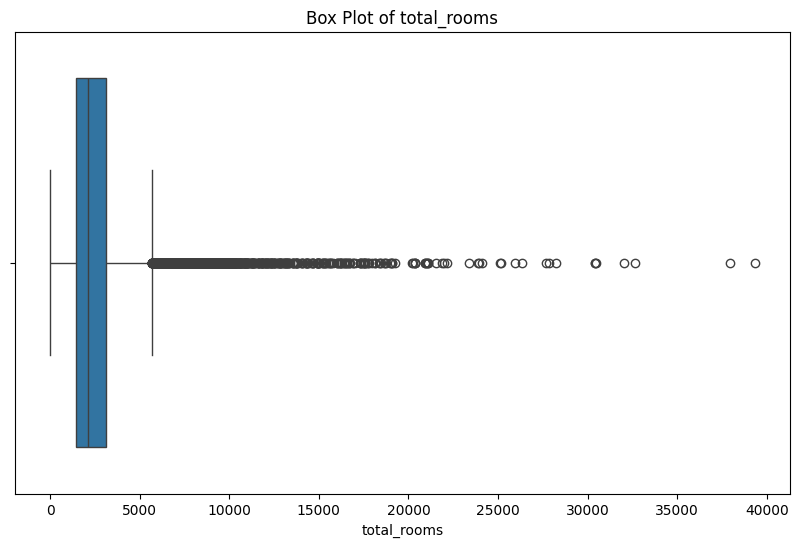


Outliers for total_rooms:
       total_rooms
1           7099.0
101         5806.0
104         5871.0
185         5963.0
283        12842.0
...            ...
20543       6861.0
20544       8800.0
20563      12139.0
20567       6809.0
20629      10035.0

[1290 rows x 1 columns]

Lower Whisker: -1089.5
Upper Whisker: 5682.5


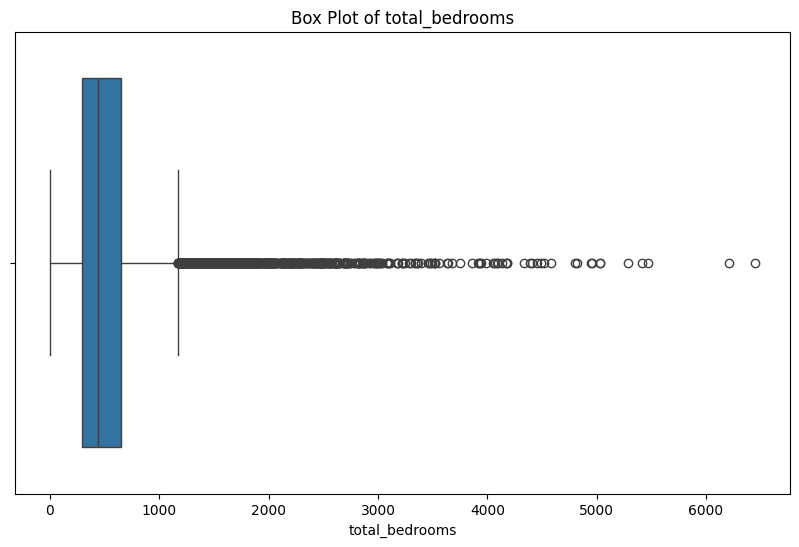


Outliers for total_bedrooms:
       total_bedrooms
95             2477.0
96             1331.0
98             1270.0
100            1414.0
101            1603.0
...               ...
20539          1516.0
20543          1820.0
20544          1857.0
20563          2640.0
20629          1856.0

[1271 rows x 1 columns]

Lower Whisker: -230.5
Upper Whisker: 1173.5


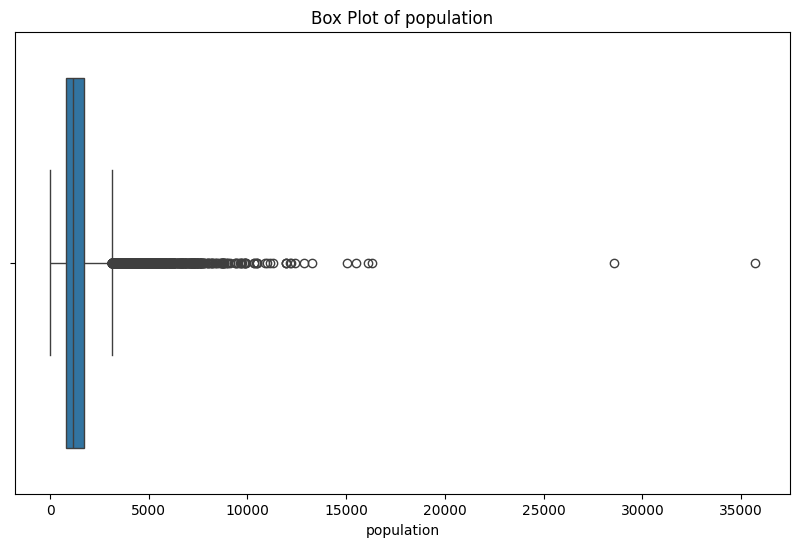


Outliers for population:
       population
95         3469.0
185        4367.0
283        4985.0
460        3337.0
485        3276.0
...           ...
20543      3717.0
20544      6330.0
20563      6837.0
20604      3265.0
20629      6912.0

[1190 rows x 1 columns]

Lower Whisker: -615.5
Upper Whisker: 3124.5


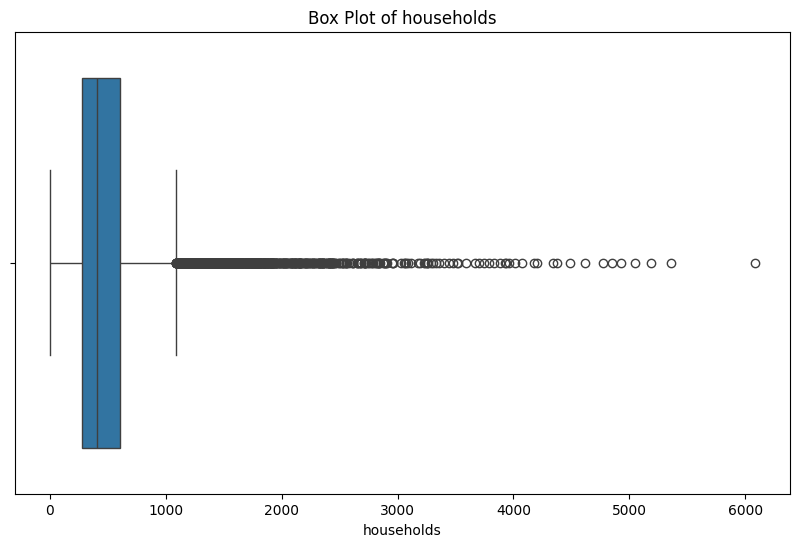


Outliers for households:
       households
1          1138.0
95         2323.0
96         1180.0
98         1250.0
100        1250.0
...           ...
20541      1115.0
20543      1767.0
20544      1832.0
20563      2358.0
20629      1818.0

[1210 rows x 1 columns]

Lower Whisker: -206.0
Upper Whisker: 1090.0


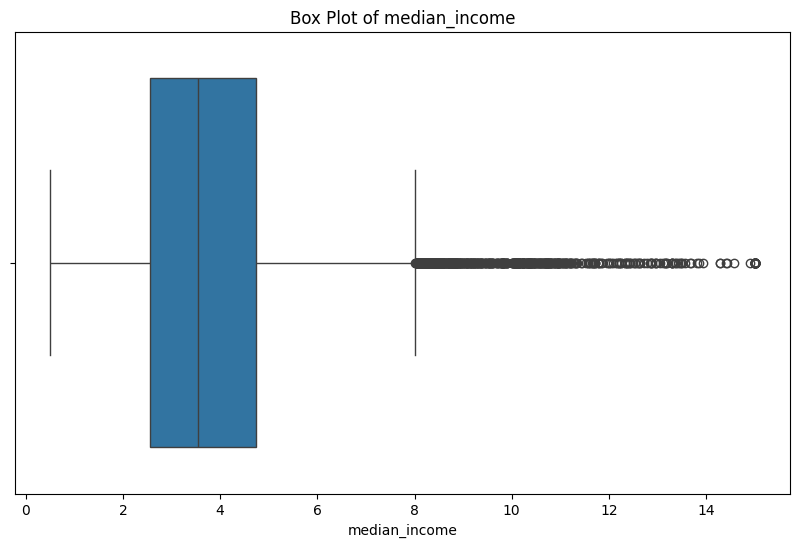


Outliers for median_income:
       median_income
0             8.3252
1             8.3014
131          11.6017
134           8.2049
135           8.4010
...              ...
20426        10.0472
20427         8.6499
20428         8.7288
20436        12.5420
20503         8.2787

[670 rows x 1 columns]

Lower Whisker: -0.70675
Upper Whisker: 8.01445


In [79]:
numeric_outlier_indices = {} # a dictionary to keep indeces of each outliers of each features

# Calculate IQR for numeric features only, excluding categorical features
numeric_columns = housing_df.select_dtypes(include=['number']).iloc[:,:-1].columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=housing_df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

    # determine lower_whisker and upper_whisker
    Q1 = housing_df[column].quantile(0.25)
    Q3 = housing_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # determine outliers
    outliers = (housing_df[column] < lower_whisker) | (housing_df[column] > upper_whisker)
    
    # save indeces of outliers
    numeric_outlier_indices[column] = housing_df.index[outliers].tolist()
    
    # print the index and value of outliers of the feature
    print(f"\nOutliers for {column}:")
    print(housing_df[outliers][[column]])
    print("\nLower Whisker:", lower_whisker)
    print("Upper Whisker:", upper_whisker)

For longtitude, latitude and housing_median_age features there is no outliers, but rest of features there are 1000-odd outliers (in median there are 670 outliers)

In [80]:
# Calculate IQR for non-numeric features only, excluding categorical features
# As we can see on Distribution of ocean_proximity table above, the ISLAND value is outlier of the feature, 
# so just find the index that includes the ISLAND value on the ocean_proximity colunm
categorical_outlier_indices ={}
island_rows = housing_df[housing_df["ocean_proximity"] == 'ISLAND'].index.tolist()
categorical_outlier_indices["ocean_proximity"] = island_rows

# print the index and value of outliers of the feature
print(f"\nOutliers for {'ocean_proximity'}:")
island_table = housing_df.loc[island_rows]
island_table


Outliers for ocean_proximity:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

In [81]:
# to visualize outlier handled data frame with original data frame (for numeric values)
def compare_histograms_numeric(original_df, handled_data):
    for column in original_df.iloc[:, :-2].columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(original_df[column], kde=True, color='blue', label='Original')
        sns.histplot(handled_data[column], kde=True, color='red', alpha=0.5, label='Handled')
        plt.title(f'Comparison of {column} between Original and Removed Data')
        plt.legend()
        plt.show()

In [82]:
# to visualize outlier handled data frame with original data frame (for catogoric values)
def compare_histograms_categoric(original_df, handled_data):
    counts_df1 = original_df['ocean_proximity'].value_counts()
    counts_df2 = handled_data['ocean_proximity'].value_counts()

    counts_df1 = counts_df1.sort_index()
    counts_df2 = counts_df2.sort_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts_df1.index, y=counts_df1, color='blue', label='Original')
    sns.barplot(x=counts_df2.index, y=counts_df2, color='red', label='Handled')

    #plt.ylim(0, 100)
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.title('Comparison of Categorical Values between Original and Handled')
    plt.legend()
    plt.show()

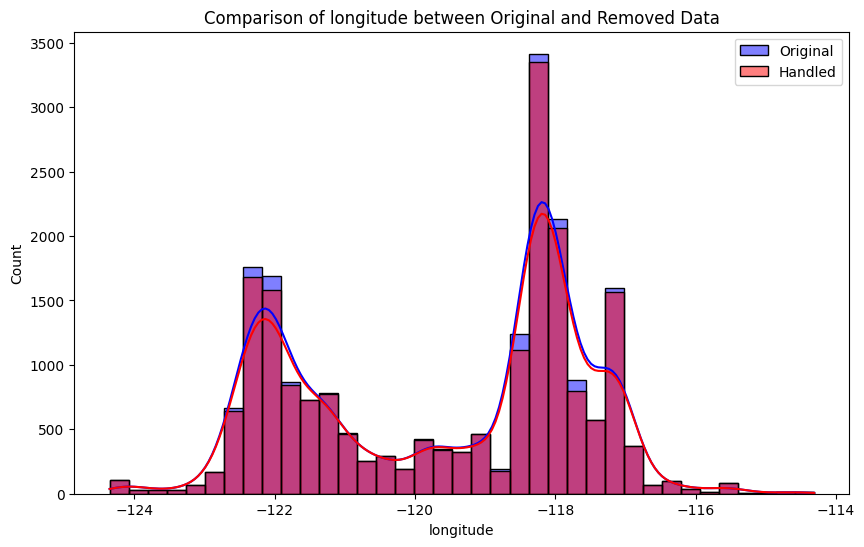

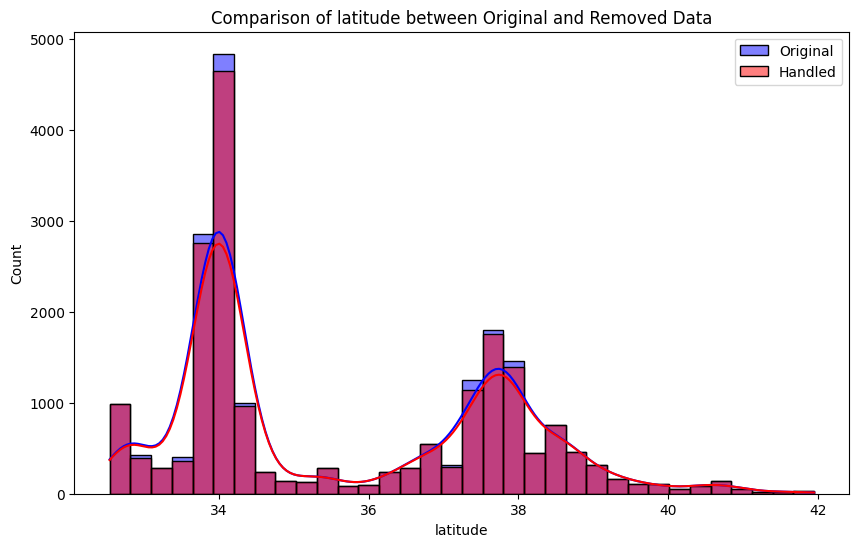

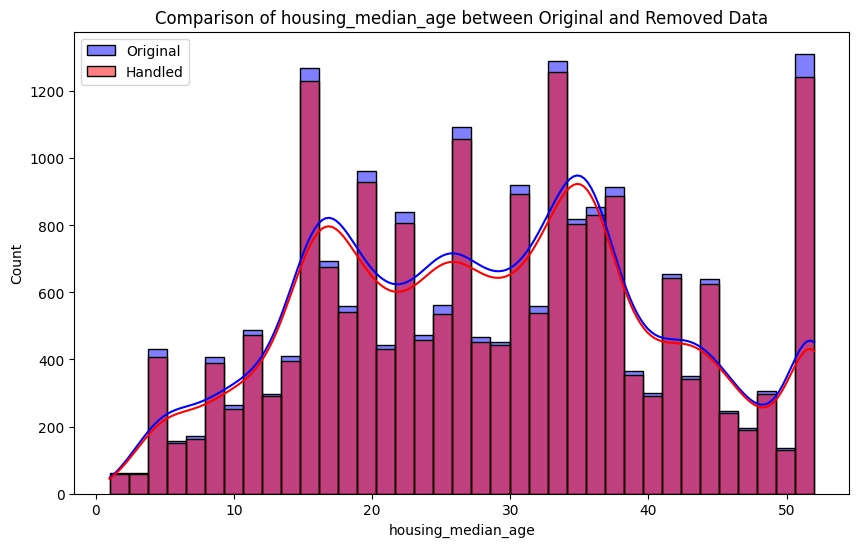

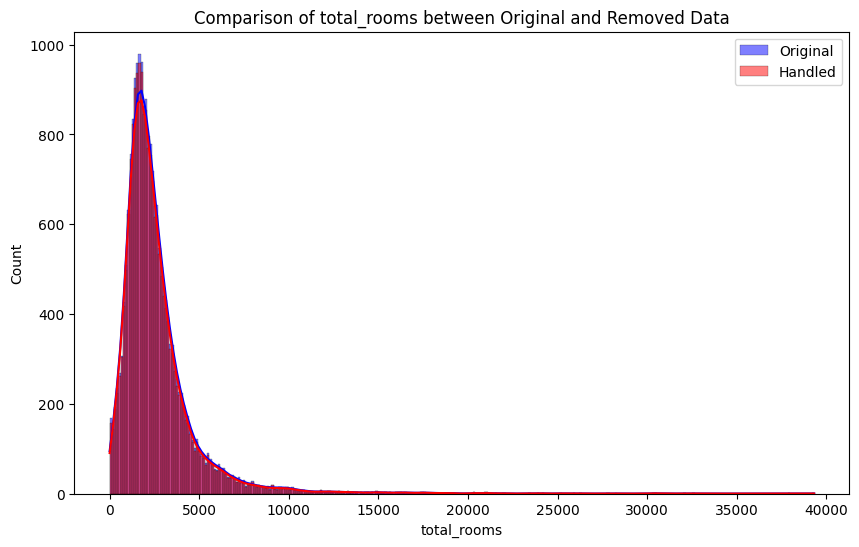

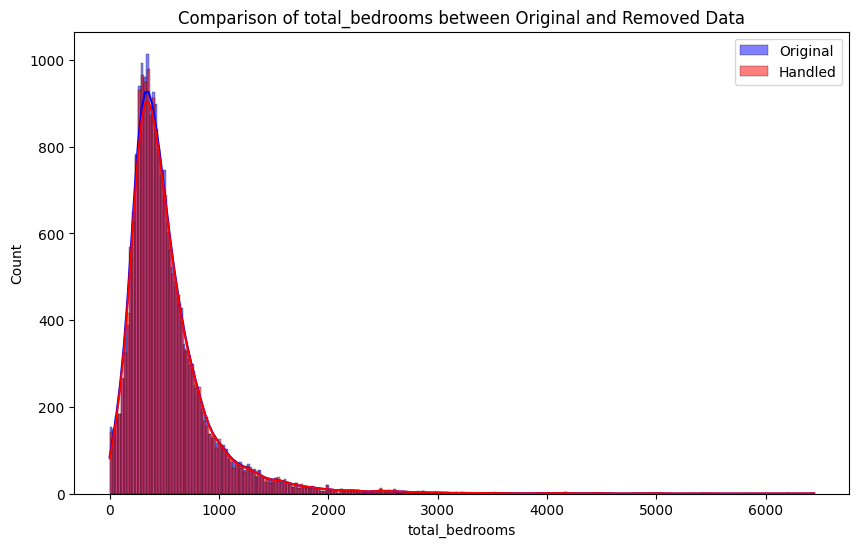

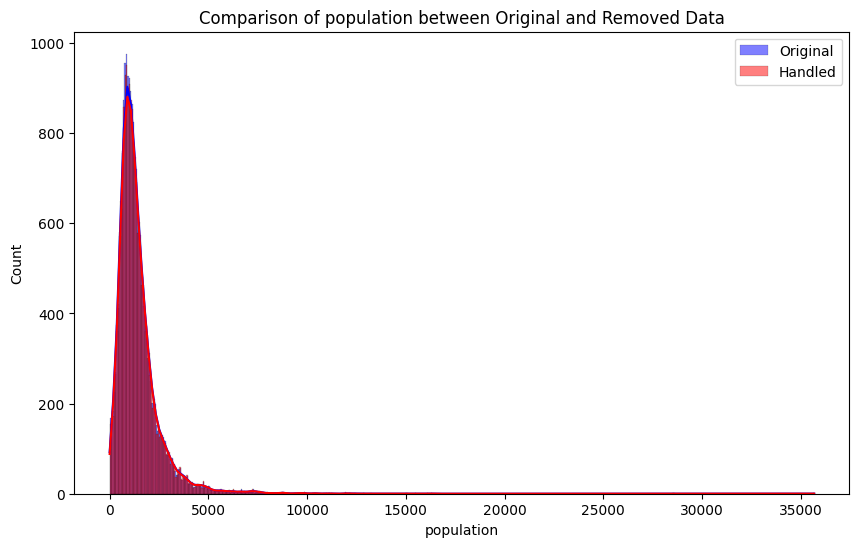

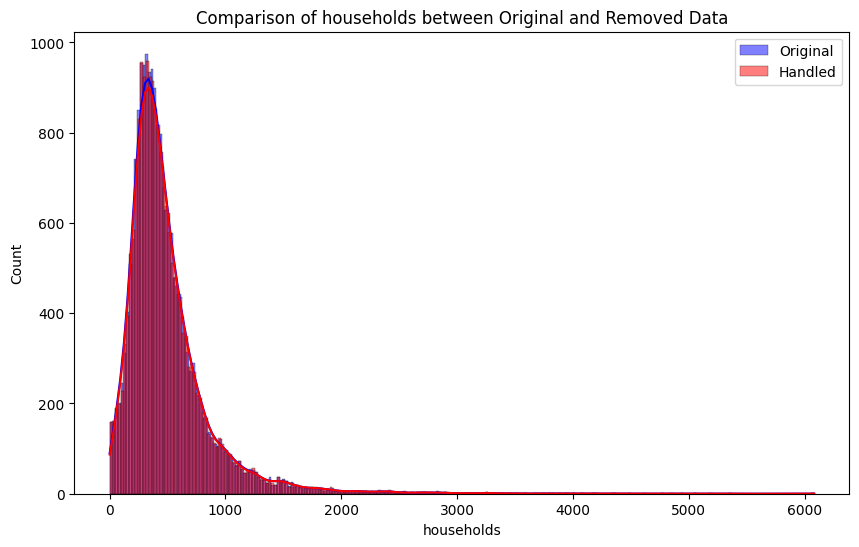

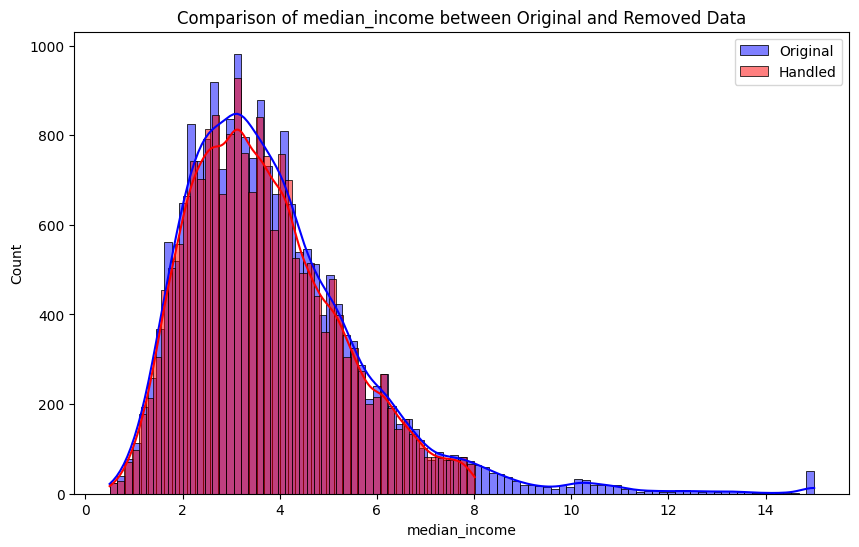

In [83]:
# Keep the dataset as is
original_housing_df = housing_df.copy()

# remove numeric outliers
housing_df_removed_numeric=housing_df.copy()
for column, indices in numeric_outlier_indices.items():
    housing_df_removed_numeric = original_housing_df.iloc[:, :].drop(indices)
    
# visualize the final data distribution
compare_histograms_numeric(housing_df,housing_df_removed_numeric)

* Since we have completely removed the rows that have outlier, the features (longtitude, latitude and housing_median_age) that do not have any outlier have also been affected by this situation. 

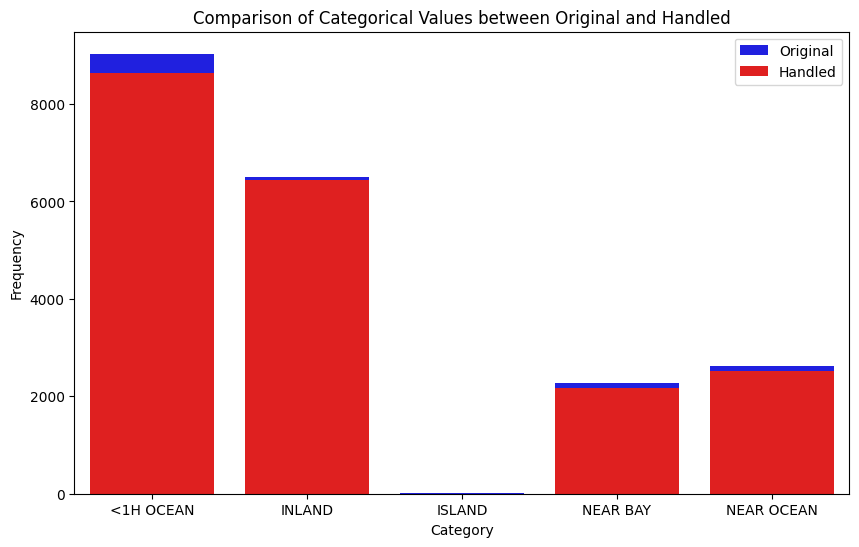

In [84]:
# remove non-numeric outliers
housing_df_removed_numeric_categoric = housing_df_removed_numeric.copy() 
for column, indices in categorical_outlier_indices.items():
    housing_df_removed_numeric_categoric = housing_df_removed_numeric_categoric.drop(indices)
compare_histograms_categoric(housing_df,housing_df_removed_numeric_categoric)

* Since we have completely removed the rows that have outlier, the values (<1H OCEAN, INLAND, NEAR BAY, NEAR OCEAN) that do not have any outlier have also been affected by this situation.
* Since there are just 5 outliers in the data that have 20000 records in it, we don't see any other changes other than a thin blue line.
But if you uncomment the #plt.ylim(0, 100) code line in the definition of compare_histograms_categoric function you can see the change.

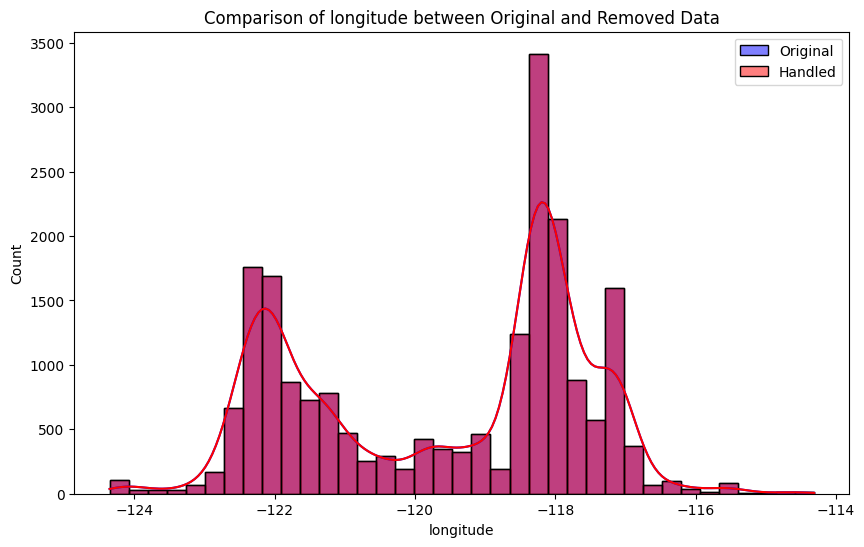

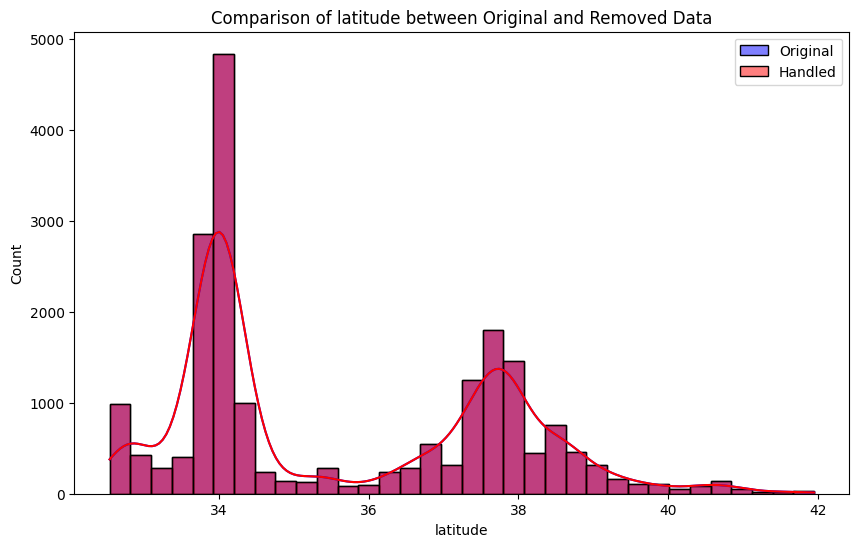

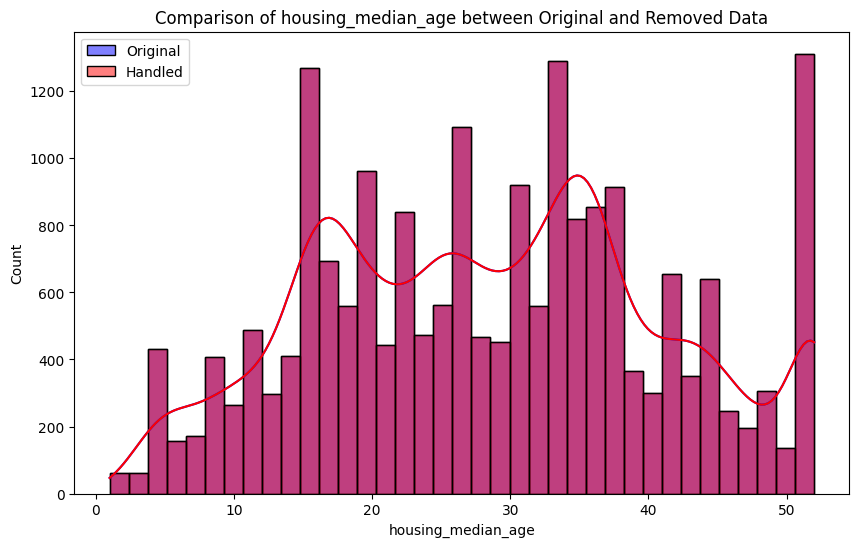

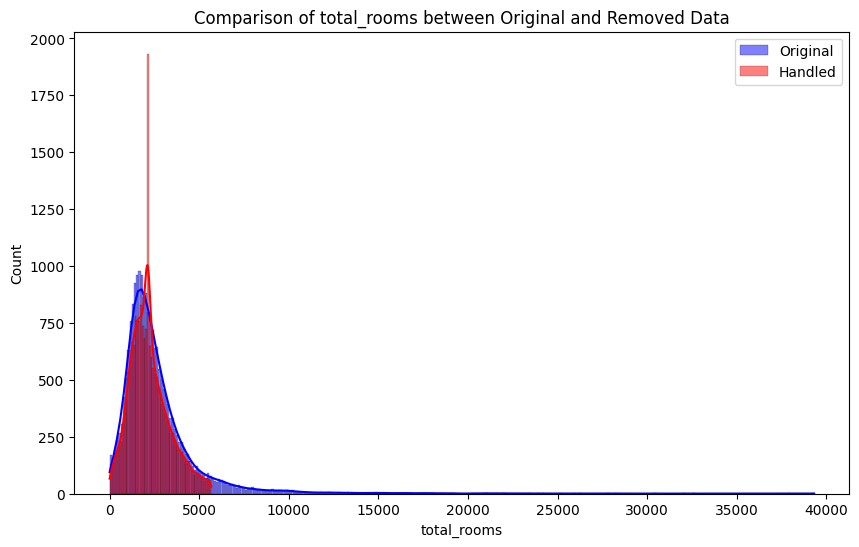

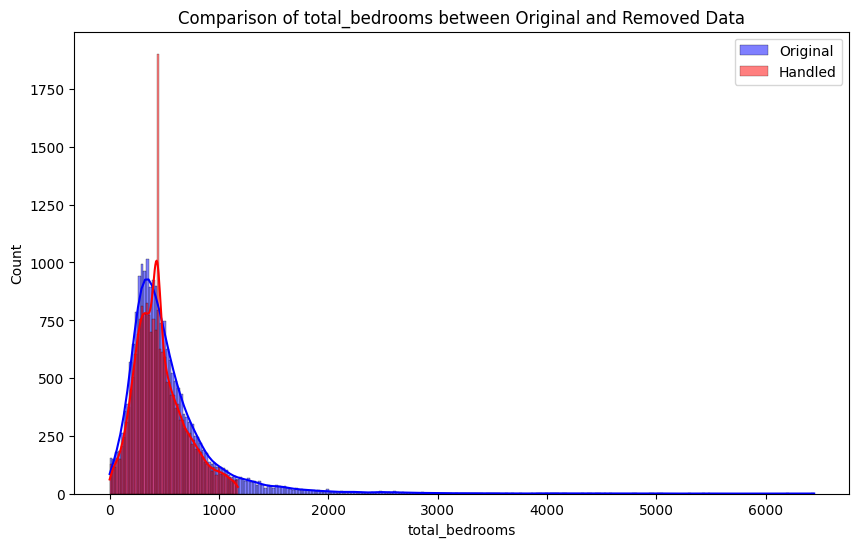

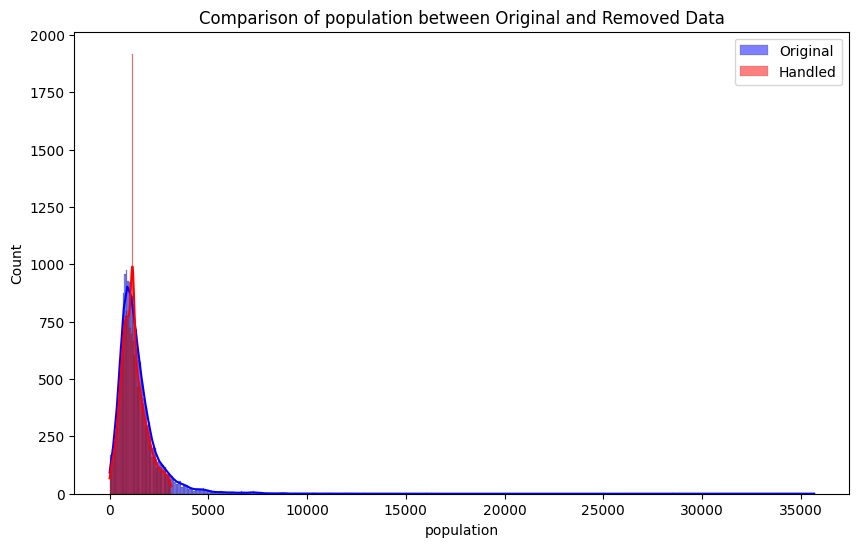

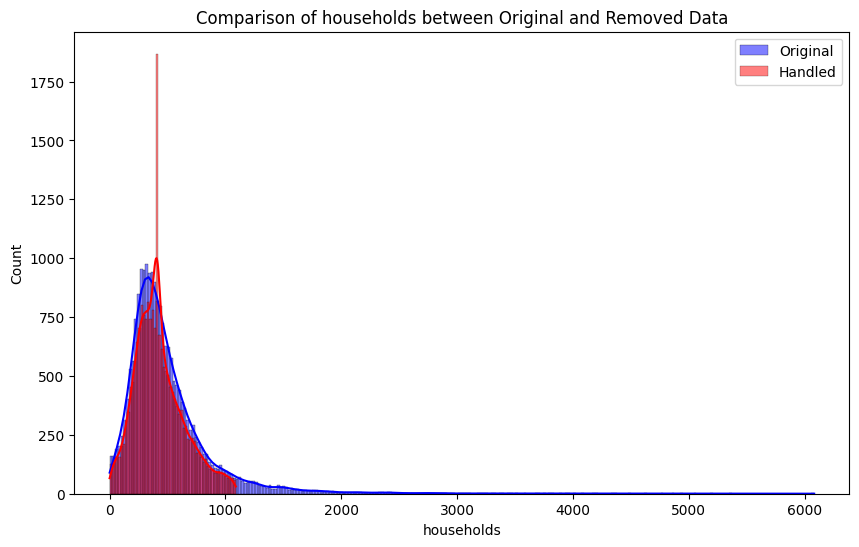

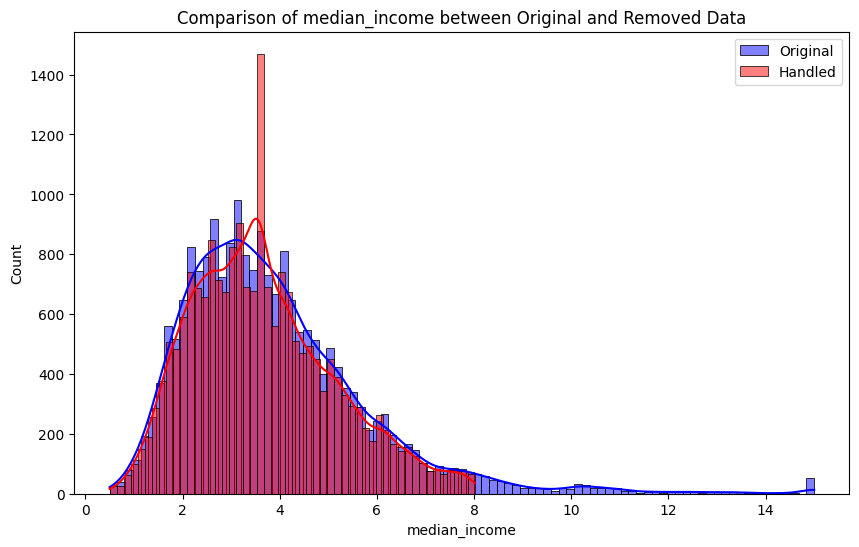

In [85]:
# Apply median imputation
housing_df_median_imputed = housing_df.copy()
for column, indices in numeric_outlier_indices.items():
    # Calculate median only for numeric columns
    numeric_medians = housing_df[column].median()
    housing_df_median_imputed.loc[indices, column] = numeric_medians

# visualize the final data distribution 
compare_histograms_numeric(original_housing_df,housing_df_median_imputed)

* Since there is no outlier value in the first three charts, the imputed data frame is the same as the original data frame. 
But in other graphs we see that the median value has been successfully imputed

In [86]:
# Apply mode imputation to the medain imputed data
housing_df_median_mode_imputed = apply_mode_imputation(housing_df_median_imputed)

Before mode imputation:
ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

After mode imputation:
ocean_proximity
<1H OCEAN     9039
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: count, dtype: int64


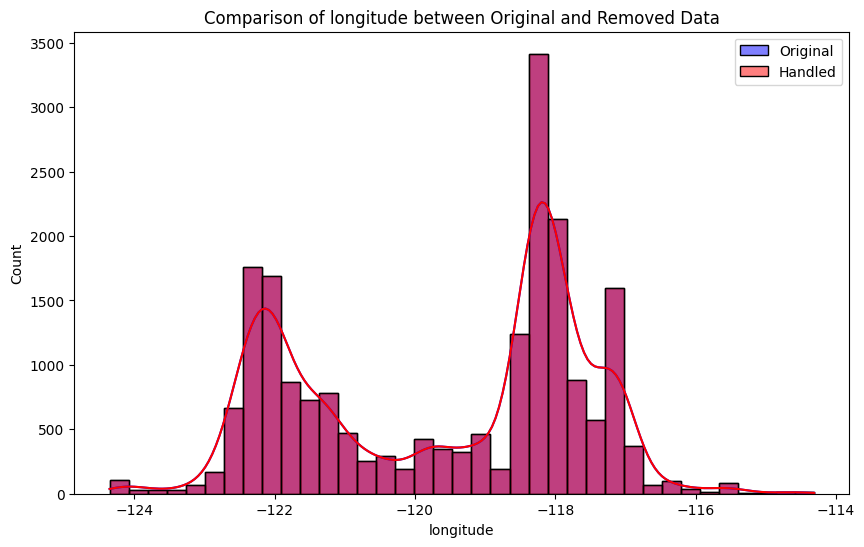

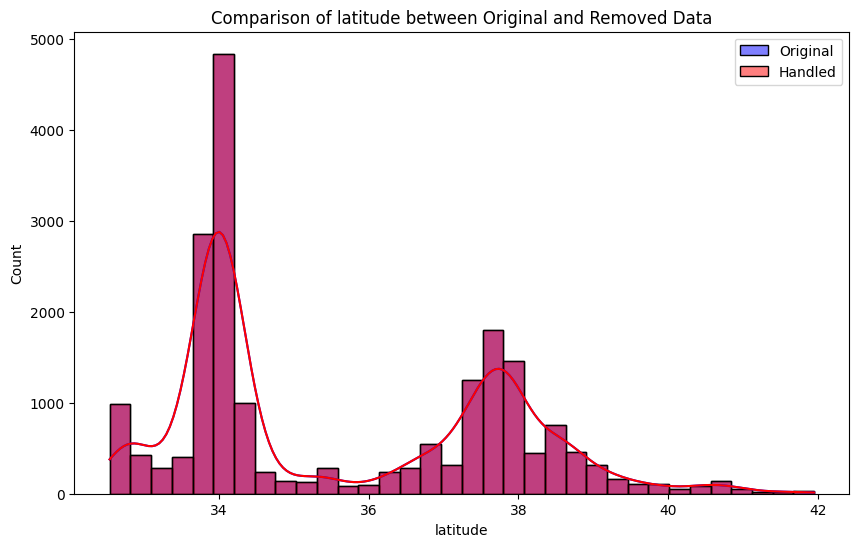

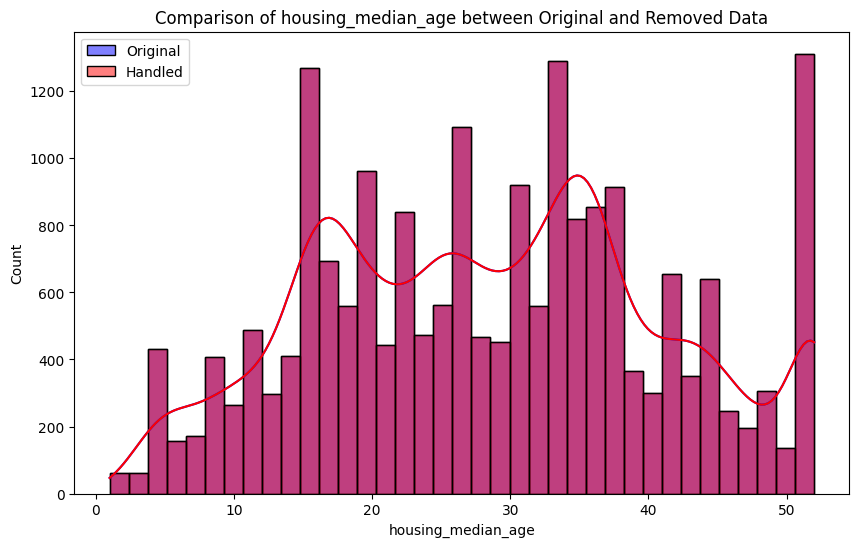

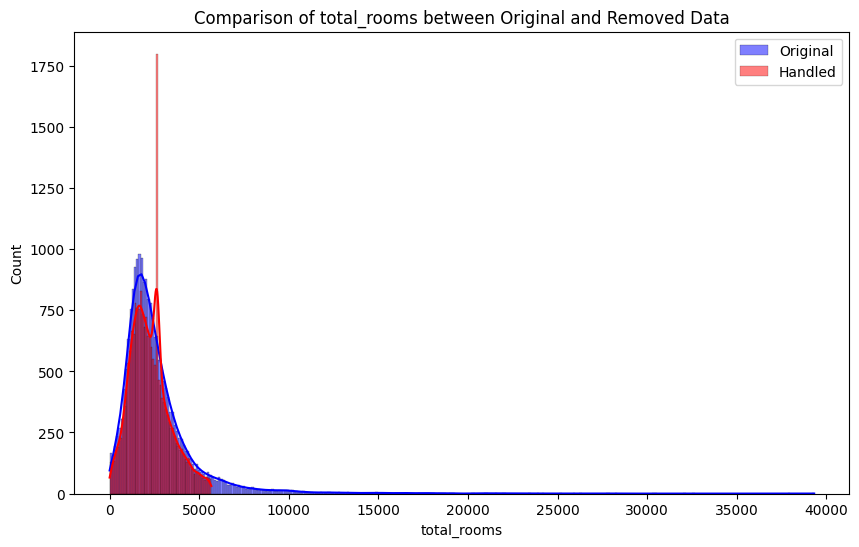

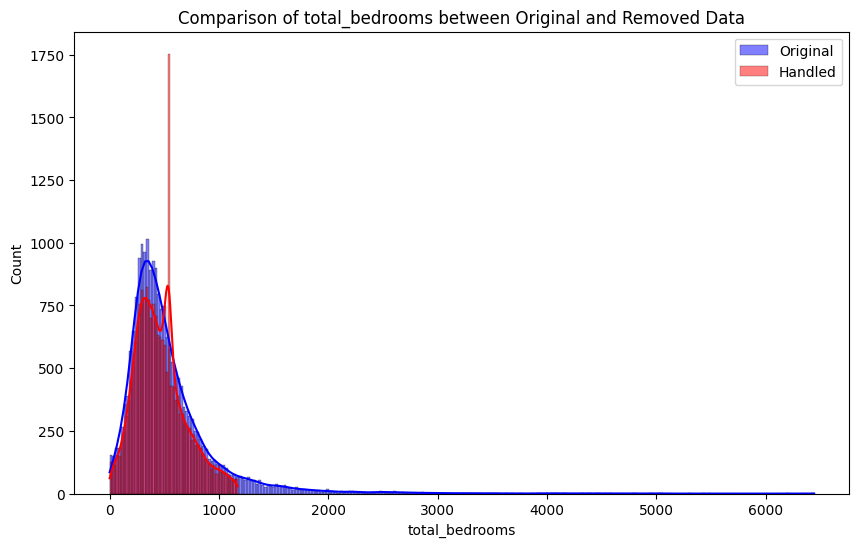

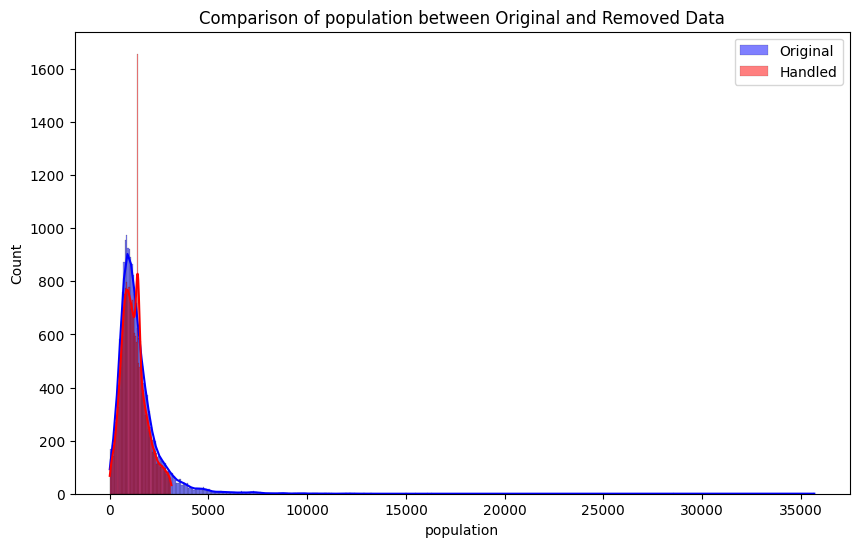

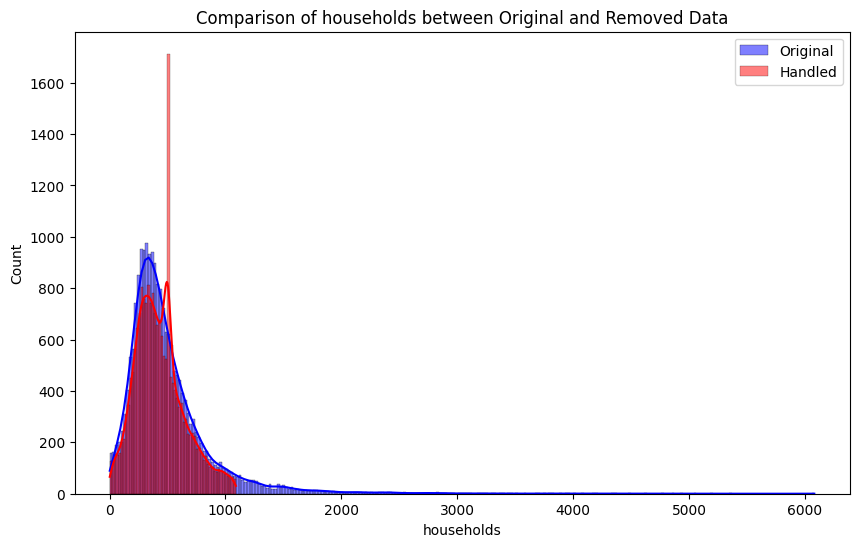

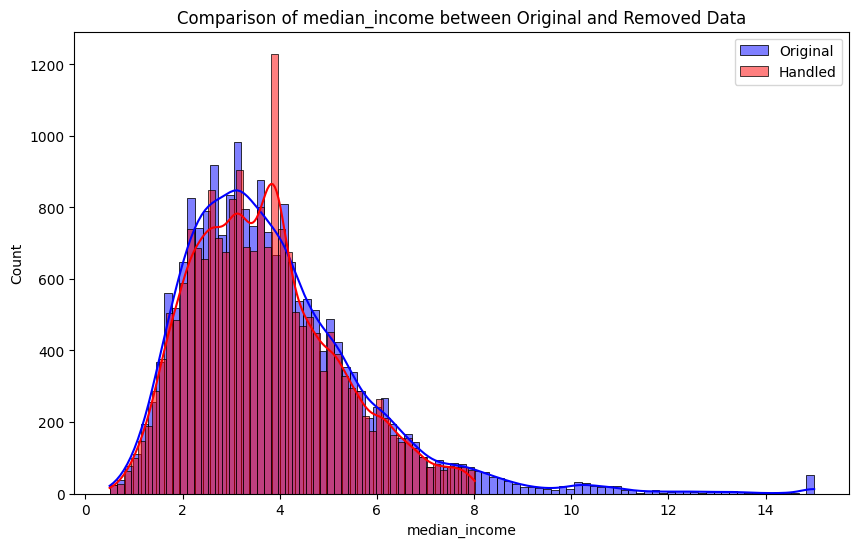

In [87]:
# Apply mean imputation
housing_df_mean_imputed = housing_df.copy()
for column, indices in numeric_outlier_indices.items():
    # Calculate median only for numeric columns
    numeric_means = housing_df[column].mean()
    housing_df_mean_imputed.loc[indices, column] = numeric_means

# visualize the final data distribution 
compare_histograms_numeric(original_housing_df,housing_df_mean_imputed)

Again since there is no outlier value in the first three charts, the imputed data frame is the same as the original data frame.
But in other graphs we see that the mean value has been successfully imputed

In [88]:
# Apply mean imputation to the maen imputed data
housing_df_mean_mode_imputed = apply_mode_imputation(housing_df_mean_imputed)

Before mode imputation:
ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

After mode imputation:
ocean_proximity
<1H OCEAN     9039
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: count, dtype: int64


In [89]:
def apply_mode_imputation(dataFrame):
    # Apply mode imputation to categorical variable
    print("Before mode imputation:\n" + str(dataFrame["ocean_proximity"].value_counts()))
    for column, indices in categorical_outlier_indices.items():
        # Calculate mode only for non-numeric columns
        mode = housing_df[column].mode().iloc[0]
        dataFrame.loc[indices, column] = mode
    print("\nAfter mode imputation:\n" + str(dataFrame["ocean_proximity"].value_counts()))
    return dataFrame

We don't use visualization technique to show that we have successfully performed the mode imputation because the change between the two data frames is at a very small level (5 outliers are removed from ISLAND value, and added to the OCEAN value), it is more satisfactory to show this change with numerical values instead of visualizing it. 
Explanation about tables : (look at the cells that function is called)
* If you look at the first table ISLAND = 5 and <1H OCEAN = 9034
* But in the second table ISLAND is not available anymore and <1H OCEAN = 9039 (9034 + 5)
  
As a result, the mode imputation was successfully performed


## Prep for encode part
an arrangement made to avoid problems when the encode cell is executed more than once

In [90]:
# original data
original_housing_df = housing_df.copy()
# outlier removed data 
housing_df_removed = housing_df_removed_numeric_categoric
# median imputed data
housing_df_median = housing_df_median_mode_imputed
# mean imputated data
housing_df_mean = housing_df_mean_mode_imputed

dataFrameList=[original_housing_df,housing_df_removed,housing_df_median,housing_df_mean]

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [91]:
# The ordinal order like this : ISLAND-NEAR OCEAN-NEAR BAY-<1H OCEAN-INLAND
for df in dataFrameList:
    ordinal_mapping = {'ISLAND': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, '<1H OCEAN': 4, 'INLAND': 5}
    df['ocean_proximity'] = df['ocean_proximity'].map(ordinal_mapping)

## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split." (8 Pts)

You  cannot use scikit-learn's shuffle.

In [92]:
np.random.seed(21) # to get same result for each re-run
shuffled_indices_list = np.random.permutation(housing_df.index) 
shuffled_housing_df = housing_df.loc[shuffled_indices_list]

split_index = int(0.7 * len(shuffled_housing_df))
train_set= shuffled_housing_df.iloc[:split_index]
test_set= shuffled_housing_df.iloc[split_index:]

print("Training Set:\n")
print(train_set)
print("Testing Set:\n")
print(test_set)

Training Set:

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
526      -122.25     37.77                52.0       2650.0           566.0   
17499    -119.78     34.44                28.0       2864.0           495.0   
156      -122.24     37.81                52.0       2485.0           313.0   
1937     -120.98     38.66                 9.0       2073.0           404.0   
19172    -122.67     38.44                29.0       2551.0           448.0   
...          ...       ...                 ...          ...             ...   
17705    -121.81     37.31                14.0       2731.0           578.0   
14439    -117.24     32.80                30.0       1917.0           462.0   
15368    -117.17     33.28                16.0       1921.0           312.0   
19553    -121.00     37.62                28.0       1153.0           420.0   
9645     -120.87     37.05                29.0       4176.0           779.0   

       population  households  media

# 2. REGRESSION (50 Pts)
* Target value: median_house_value
* Predictors: The rest

## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:"
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Predict the test set and calculate the MSE value for each k. Plot the MSE vs k curve to decide on the optimal k. Additionally, report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?

You can use scikit-learn's KNeighborsRegressor.

In [93]:
import sklearn
from sklearn.metrics import r2_score # just in case :)

In [94]:
def knn_regression(dataFrame, df_name):
    # Split the data into train and test sets
    selected_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
    # Sorry for using train_test_split() built in function, i know i shouldn't use but
    # before it was asked from the piazza I had already written and finished my code not knowing that we should not use it.
    # Then I tried to write a knn_regression function by doing manual shuffle, but I couldn't manage it. 
    # i apologize profuesly, it won't happen again :( 
    X_train, X_test, y_train, y_test = train_test_split(dataFrame[selected_columns], dataFrame['median_house_value'], test_size=0.2, random_state=21)

    MSE_values=[]
    k_values = list(range(1, 31, 2))
    r_squared_values =[]
    
    for k in k_values:
         # Create an instance of kNN with a number of neighbors between 1-30
        knn = KNeighborsRegressor(n_neighbors=k)
        # then fit kNN regression model to train data
        knn.fit(X_train, y_train)
        # Predict the test set
        y_pred = knn.predict(X_test) 
        # keep the R-squared value
        r_squared_values.append(r2_score(y_test, y_pred))
        MSE_values.append(mean_squared_error(y_test, y_pred))
        
    min_index = MSE_values.index(min(MSE_values))
    optimal_k = k_values[min_index]
    r_squared_value = r_squared_values[min_index]
    
    # sketch Elbowed Curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, MSE_values, marker='o', linestyle='-', color='b')
    plt.title(f'Elbowed Curve for Optimal K for {df_name}')
    plt.xlabel('K Values')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.show()
    print(f'Optimal k value: {optimal_k}\nMinimum MSE value: {min(MSE_values)}\nR-squared value: {r_squared_value}')

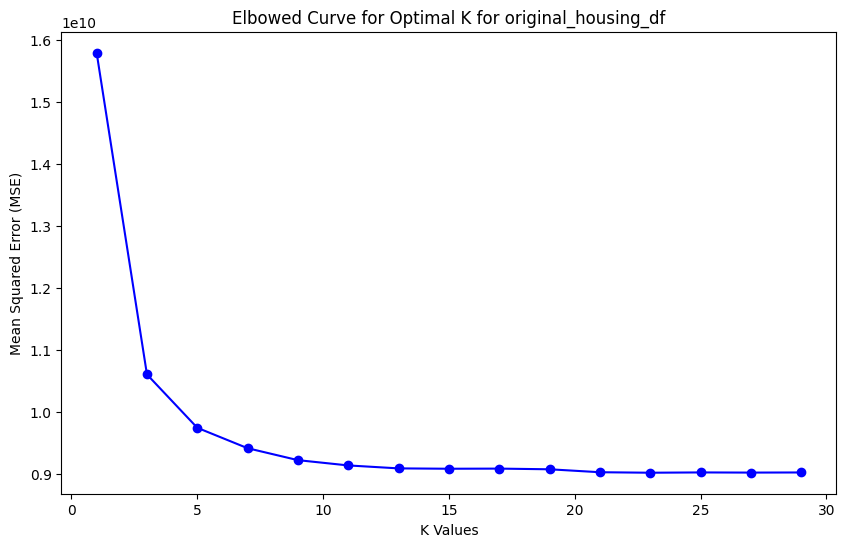

Optimal k value: 23
Minimum MSE value: 9016283214.9632
R-squared value: 0.3196753629900737


In [95]:
# original dataset on kNN Regression
knn_regression(original_housing_df,"original_housing_df")

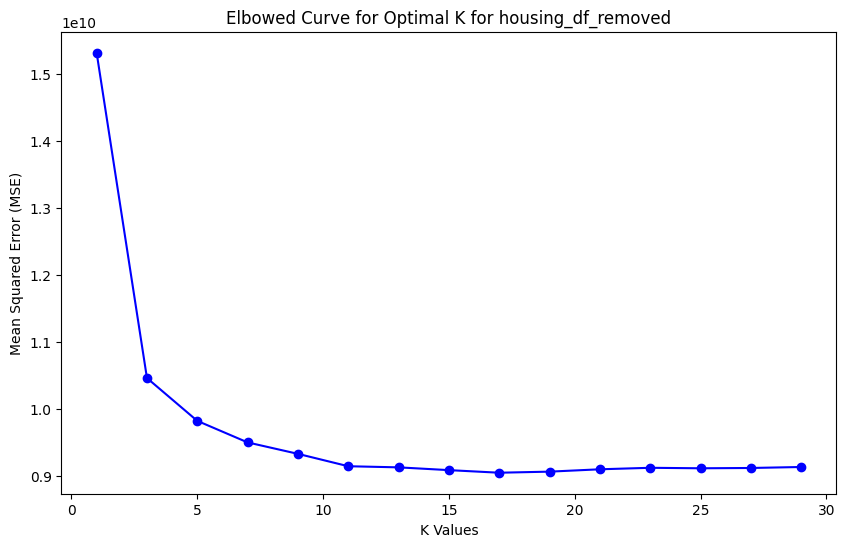

Optimal k value: 17
Minimum MSE value: 9051009931.103832
R-squared value: 0.25600695658793515


In [96]:
# outlier-removed dataset on kNN Regression
knn_regression(housing_df_removed,"housing_df_removed")

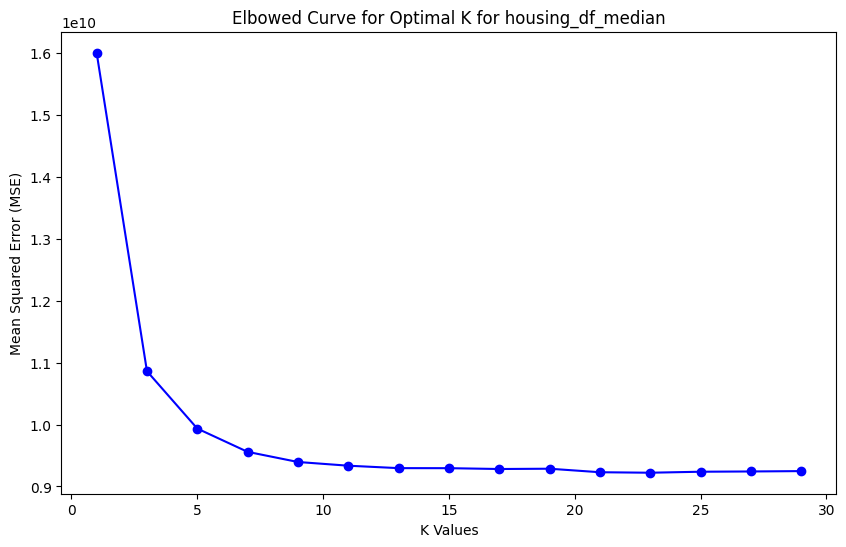

Optimal k value: 23
Minimum MSE value: 9221894544.013168
R-squared value: 0.3041609376480543


In [97]:
# median-imputed dataset on kNN Regression
knn_regression(housing_df_median,"housing_df_median")

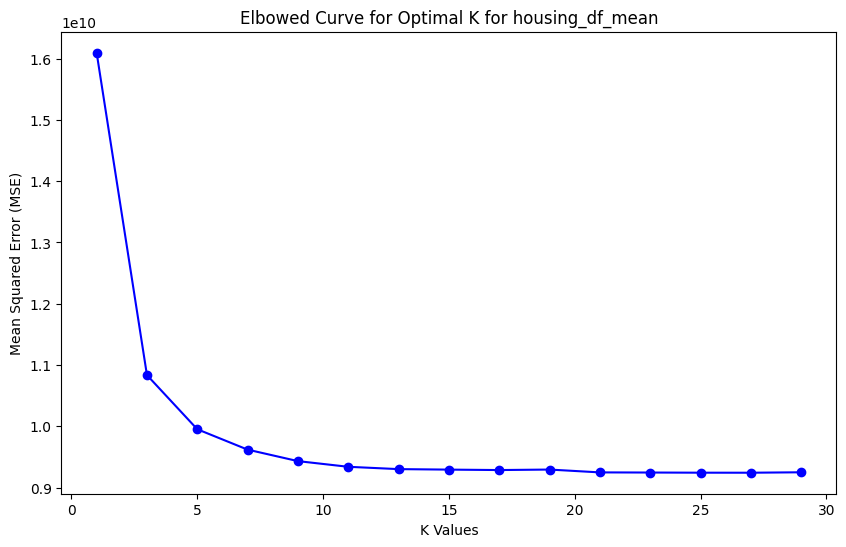

Optimal k value: 27
Minimum MSE value: 9243883553.593128
R-squared value: 0.3025017545230314


In [98]:
# mean-imputed dataset on kNN Regression
knn_regression(housing_df_mean,"housing_df_mean")

## Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?
Increasing order of MSE values
* MSE value for original_housing_df : 9016283214.9632
* MSE value for housing_df_removed : 9051009931.103832
* MSE value for housing_df_median : 9221894544.013168
* MSE value for housing_df_mean : 9243883553.593128

Original_housing_df data gives the best result.

* Whether eliminating or replacing outliers will improve model performance is case-specific. Therefore, it is important to carefully evaluate the different outlier handling methods and accurately assess the model performance. In this "experiment" we handle with outliers by using 4 method.
* The process of eliminating or modifying outliers means that it removes or modifies some observations from the original data set. In this case, you may have lost some of the information in the original data set. If the extracted or modified observations are important for the model to learn, this data loss may negatively affect the model's performance.
* The fact that the best result is achieved with the original dataset (instead of remove or mean/median imputation) shows us data loss or exchange negatively affect the model's performance. This means outliers have important info which are not explained by our simple models.

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following:
    * Split the data into train and test sets
    * Fit a linear regression model to train data. Predict the test set and calculate the MSE value.

In [99]:
from sklearn.linear_model import LinearRegression # just in case :)
def linear_regression(dataFrame):
    # Split the data into train and test sets
    selected_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
    X_train, X_test, y_train, y_test = train_test_split(dataFrame[selected_columns], dataFrame['median_house_value'], test_size=0.2, random_state=21)
    # Fit a linear regression model to train data.
    model = LinearRegression()
    model.fit(X_train, y_train)
    #Predict the test set and calculate the MSE value.
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    return MSE

In [100]:
print("On Linear Regression\n")
# original dataset on Linear Regression
print(f'MSE value for original dataset : {linear_regression(original_housing_df)}')
# outlier-removed dataset on Linear Regression
print(f'MSE value for outlier-removed dataset : {linear_regression(housing_df_removed)}')
# median-imputed dataset on Linear Regression
print(f'MSE value for median-imputed dataset : {linear_regression(housing_df_median)}')
# mean-imputed dataset on Linear Regression
print(f'MSE value for mean-imputed dataset : {linear_regression(housing_df_mean)}')

On Linear Regression

MSE value for original dataset : 4754500683.168817
MSE value for outlier-removed dataset : 5058071792.114316
MSE value for median-imputed dataset : 6629585008.027586
MSE value for mean-imputed dataset : 6388404004.802117


Linear Regression model has the lowest MSE value on Original dataset (same with in kNN regression model)

## 2.3. Compare the Regression Methods (10 Pts)

Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.). Discuss the strengths and limitations of each model based on your results

* Across the all dataset versions Linear Regression model is better then kNN Regression model. Before explaining why, I would like to provide the following information:
  *  Linear Regression assumes a linear relationship between features and the target variable. If the relationship is more complex, linear regression might struggle, especially if there are non-linear patterns in the data
  * kNN Regression, on the other hand, is a non-parametric model and can capture non-linear relationships. However, it might be sensitive to the imputation method if it affects the distance calculations
* With these info, let's examine our dataset: Our California Housing Prices dataset is linear dataset as generally . For example as the total bedroom data increases, the price of the house naturally  increases. This also applies to longitude, latitude, median_income, total_bedrooms variables. But it's different for the variable of ocean_proximity, as the distance to the ocean increases, the price of the house falls, naturally (This is also a case of linearity). Therefore, since our data set is linear, it is the expected result that the Linear Regression model will give better results then kNN Regression model.
* But in both models, original dataset is the best dataset for these model. What we understand from this situation is that the outliers in our data are carrying really important information that needs to be learned by our model.
* Across kNN Rregression model's MSE values, the worst MSE value (9243883553.593128) is for mean imputed data set, across Linear Regression model's MSE values, the worst MSE value is for median imputed data set (6388404004.802117). Its reason is that, different imputation methods may have varying impacts on the predictive performance of different models. Some models may be more sensitive to the type of imputation use. The importance of different features can vary between models. Some features might be more critical for one model than another, and imputing them differently can impact the overall model performance 

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **MAKE USE OF THEM RESPONSIBLY**. That is, you can utilize them to enhance understanding and support your original work, **not to replace it**. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.

# REFERENCES
[1] Nugent, C. (n.d.). California Housing Prices [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices